In [307]:
# importing required packages:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [308]:
# Data reading:

df  = pd.read_csv('/content/census-income .csv')

In [309]:
# top 5 records:

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


We have to predict annual income of an individual whether more than 50k or less than 50k (annual_income---->Target vriable)

In [310]:
# last 5 rows:
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [311]:
# checking datatypes:
df.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education-num,int64
marital-status,object
occupation,object
relationship,object
race,object
sex,object


Every column has correct datatype assigned no need to change any data type

In [312]:
# checking data shape:
df.shape

(32561, 15)

In [313]:
# brief summary of data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  annual_income   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


- Data having 32560 rows and 15 columns
- each column having correct data type
- futher we will perform the EDA and will gain insights from those

In [314]:
# checking nulls:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [315]:
# checking duplicates:
df.duplicated().sum()

24

In [316]:
# removing duplicates:

print(f'Shape before dropping duplicates {df.shape}')

df.drop_duplicates(inplace=True)

print(f'Shape after dropping duplicates {df.shape}')

Shape before dropping duplicates (32561, 15)
Shape after dropping duplicates (32537, 15)


- No null values were observed
- there are some duplicate values which we have dropped sucessfully

In [317]:
# Analysing the categorical and numerical columns:

cat_features = [i for i in df.columns if df[i].dtype=='object']
numerical_features = [ i for i in df.columns if df[i].dtype!='object']

print("Categorical variables:",cat_features)
print()
print("Numerical variables:",numerical_features)

Categorical variables: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'annual_income']

Numerical variables: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [318]:
# Analysing numerical features:

df[numerical_features].describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


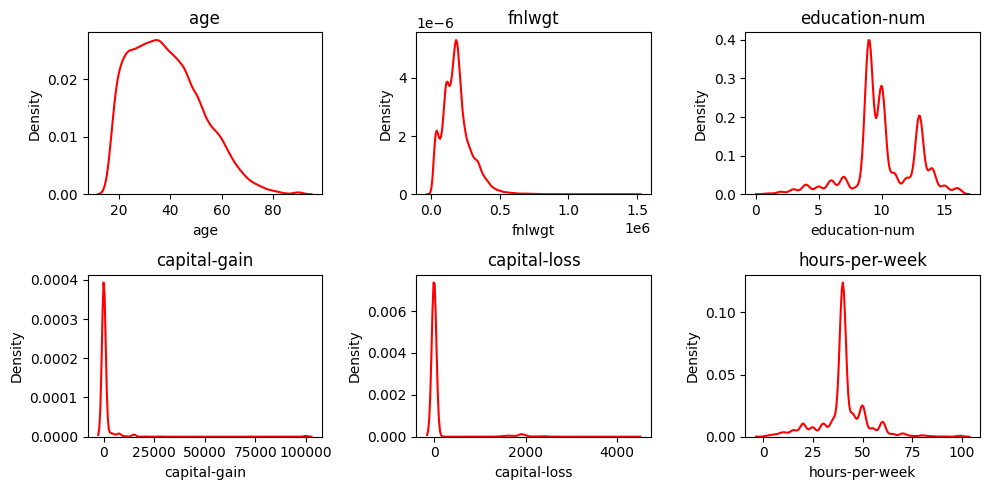

In [319]:
plt.figure(figsize=(10,5))
for i in range(0,len(numerical_features)):
  plt.subplot(2,3,i+1)
  sns.kdeplot(df[numerical_features[i]],color='r')
  plt.title(numerical_features[i])
plt.tight_layout()
plt.show()

In [320]:
# based on graph we can say 'Age' of a individual range from 17 to 90 do decide his income,
# and other columns like 'capital gain', capital loss' are positive skwed

In [321]:
# Analysing object columns:

df[cat_features].describe()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,annual_income
count,32537,32537,32537,32537,32537,32537,32537,32537,32537
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22673,10494,14970,4136,13187,27795,21775,29153,24698


In [322]:
for i in df.columns:
  if df[i].dtype=='object':
    print(i,":")
    print(df[i].unique())
    print("__________________________________________________________________")

workclass :
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
__________________________________________________________________
education :
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
__________________________________________________________________
marital-status :
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
__________________________________________________________________
occupation :
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
__________________________________________________________________
relationship :
['Not-in-family'

In [323]:
# we can see that there is redundant '?' is present in many of the columns so we will simply relace them with a 'Nan'

df.replace({'?':np.nan},inplace=True)

In [324]:
for i in df.columns:
  if df[i].dtype=='object':
    print(i,":")
    print(df[i].unique())
    print("__________________________________________________________________")

workclass :
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked']
__________________________________________________________________
education :
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
__________________________________________________________________
marital-status :
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
__________________________________________________________________
occupation :
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' nan
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
__________________________________________________________________
relationship :
['Not-in-family'

In [325]:
# '?' values has been replaced with 'nan' lets check for null values:
df.isnull().sum()

,0
age,0
workclass,1836
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,1843
relationship,0
race,0
sex,0


In [326]:
df.isnull().sum().sum()

4261

In [327]:
# as these null values are less than 30% of data we will remove or drop them directly:
df.dropna(inplace=True)

In [328]:
df.shape

(30139, 15)

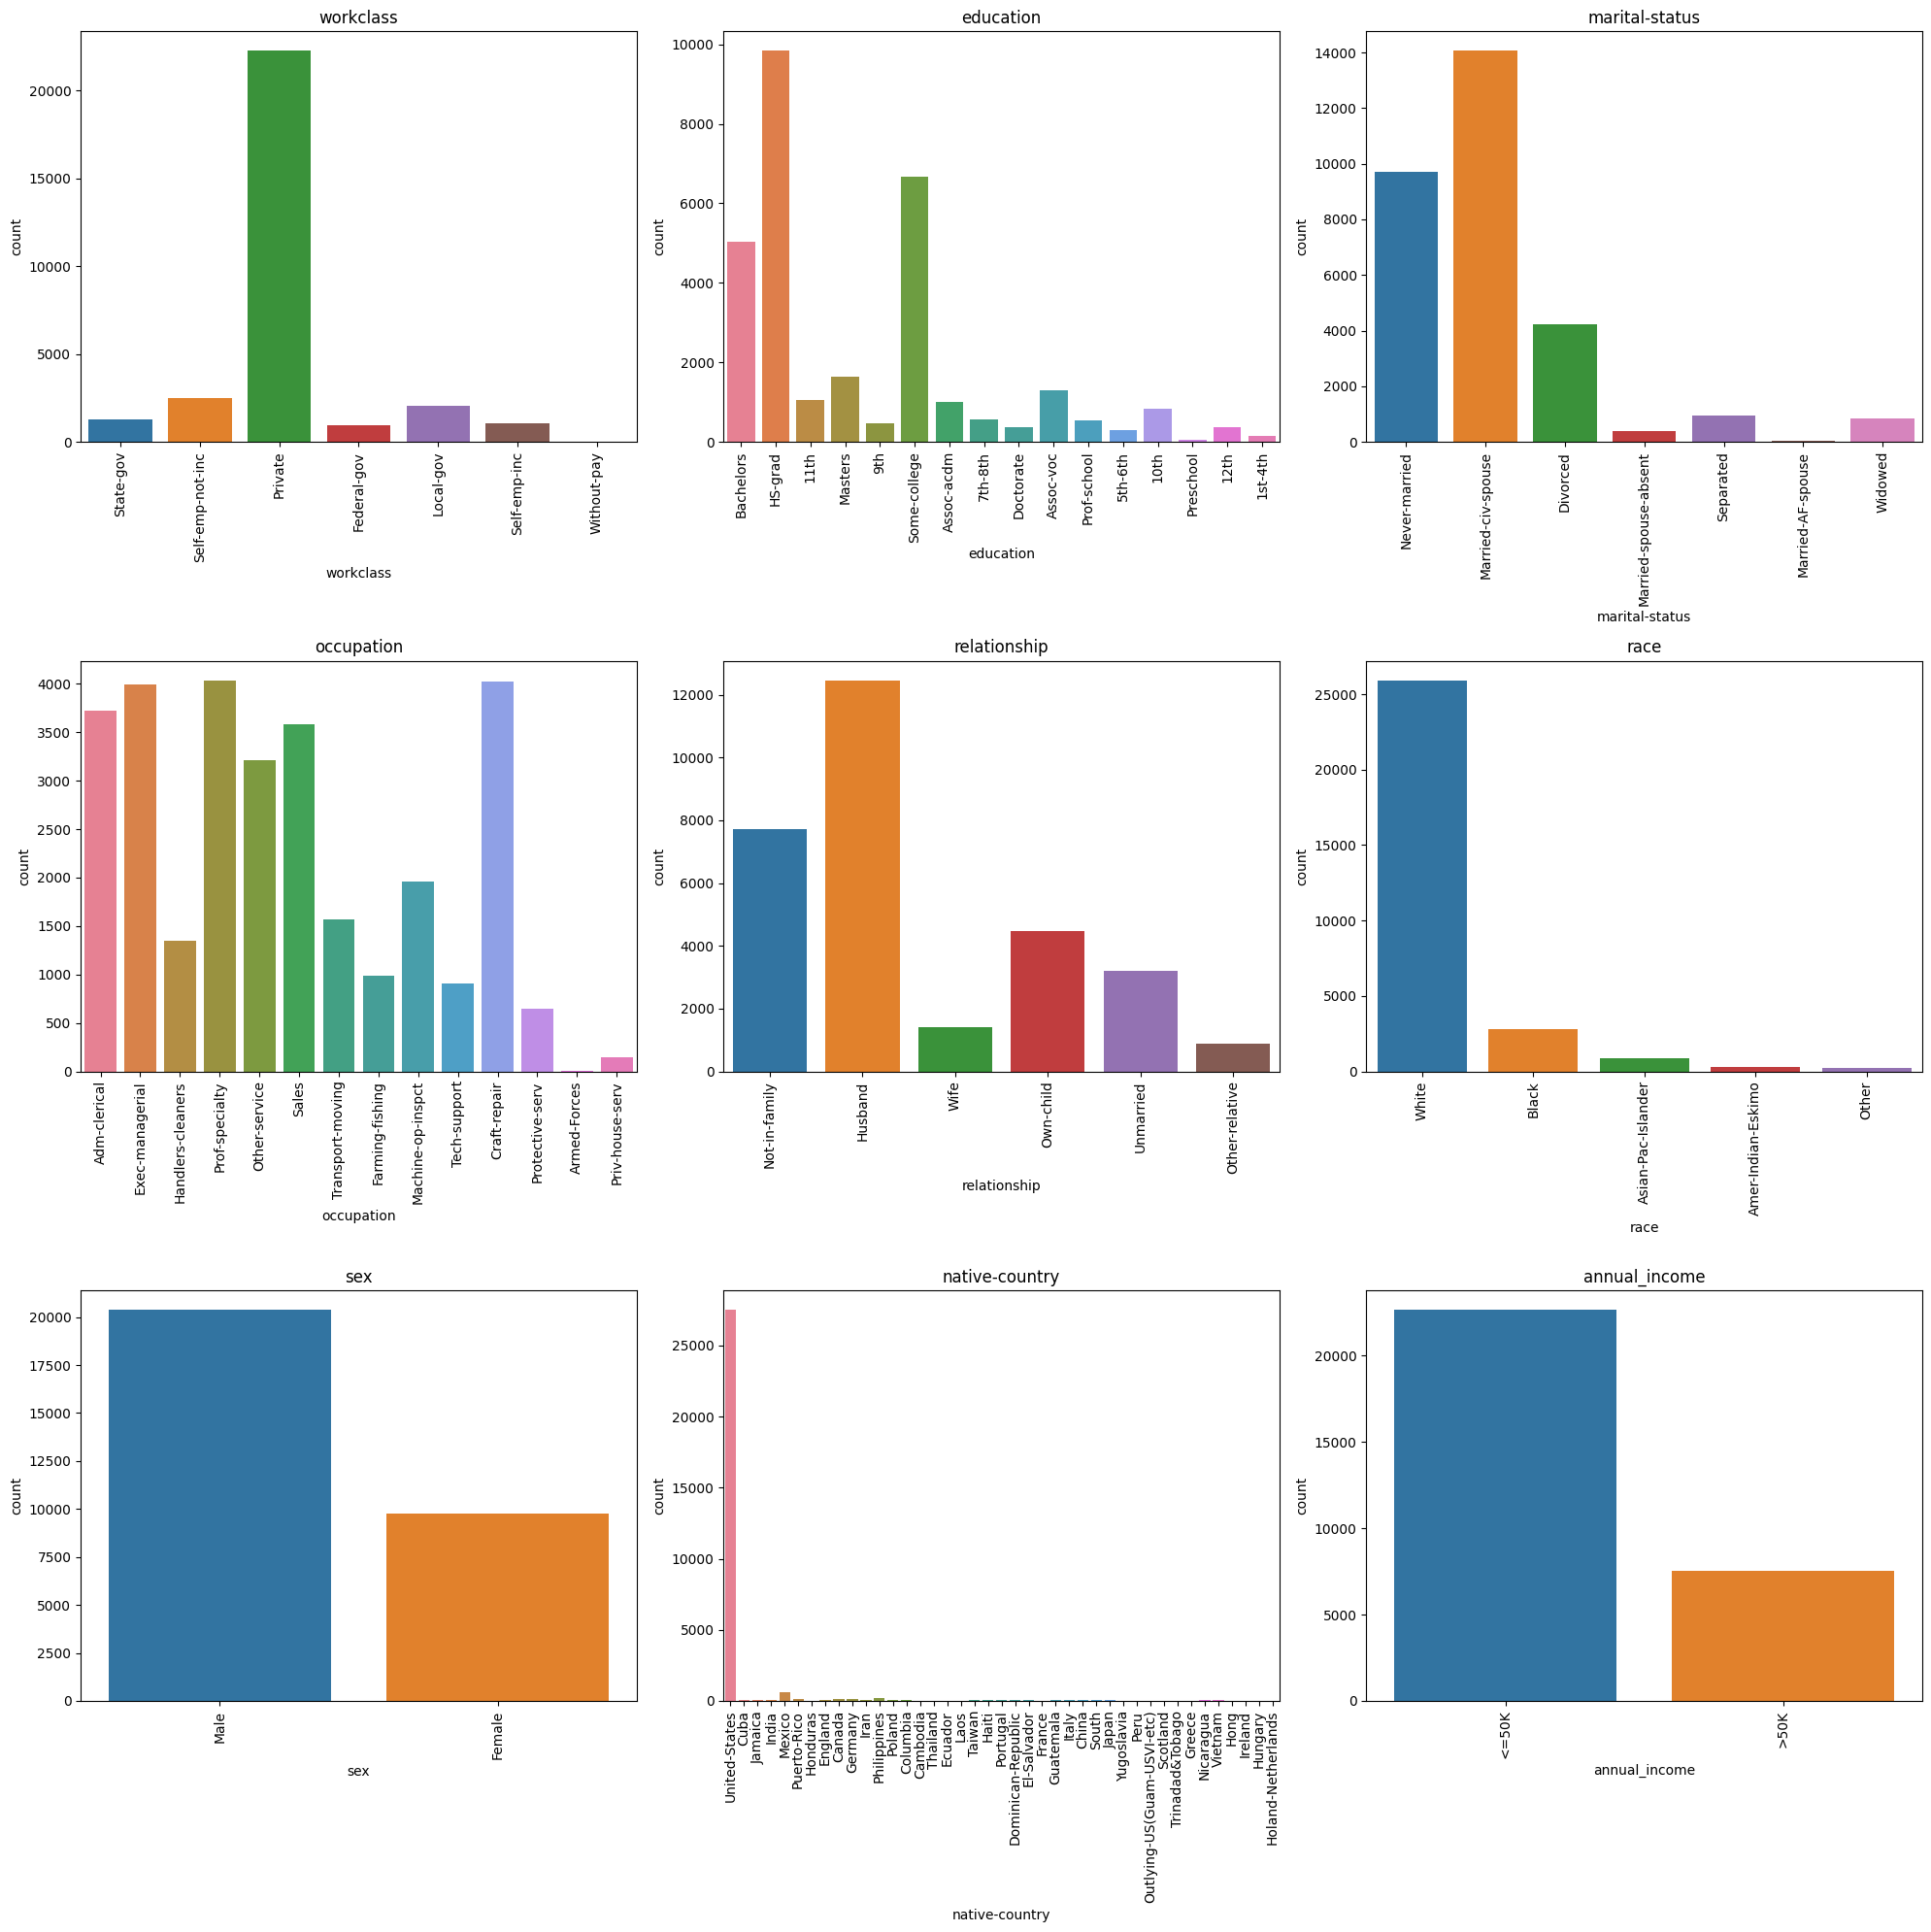

In [329]:
plt.figure(figsize=(20,20))
for i in range(0,len(cat_features)):
      plt.subplot(3,3,i+1)
      sns.countplot(data=df,x=df[cat_features[i]],hue=cat_features[i])
      plt.title(cat_features[i])
      plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


In [330]:
# most of the individuals are from 'Private work class', and
# 'male' individuals are more compare to 'female' in 'Gender'
# most of them are working in 'prof_speciality', 'craft_repair', 'Exec_managerial' and so on and very least
# individuals are working as 'Priv-house-serve' and in 'Armed-Forces'
# most of individuals have done there eduction in 'HS-grad'
# and almost all individuals are belong to 'US' native country
# 'married-civ-spouse' were more in number and belong to 'white' race
# and most individuals were earning the income as less than 50k

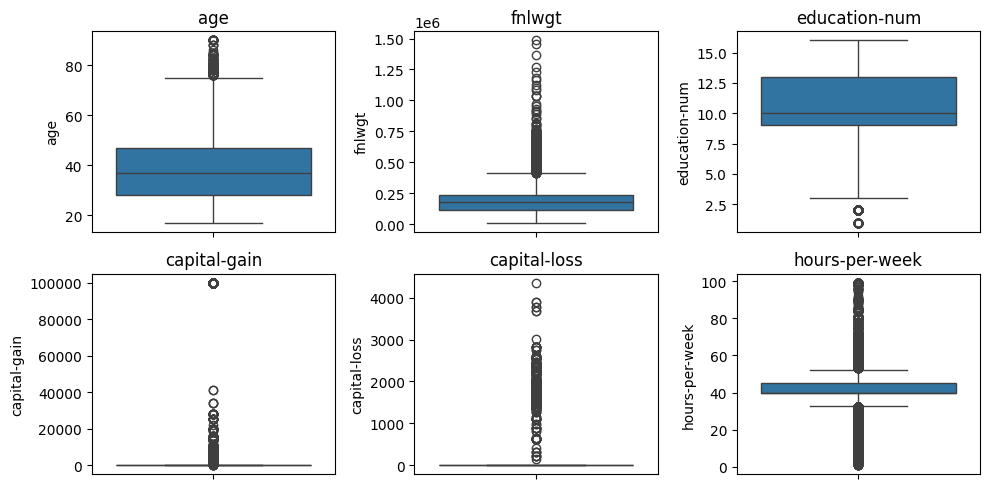

In [331]:
# outlier checking:

plt.figure(figsize=(10,5))
for i in range(0,len(numerical_features)):
  plt.subplot(2,3,i+1)
  sns.boxplot(df[numerical_features[i]])
  plt.title(numerical_features[i])

plt.tight_layout()
plt.show()

- will Ignore the outlier of 'capital gain and capital loss (values of money earned in stock market)

In [332]:
# otlier treatment:

cols = ['age','fnlwgt','education-num','hours-per-week']

for i in cols:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1
  LF = Q1 - 1.5*IQR
  UF = Q3 +1.5*IQR
  df = df[(df[i]>=LF) & (df[i]<=UF)]

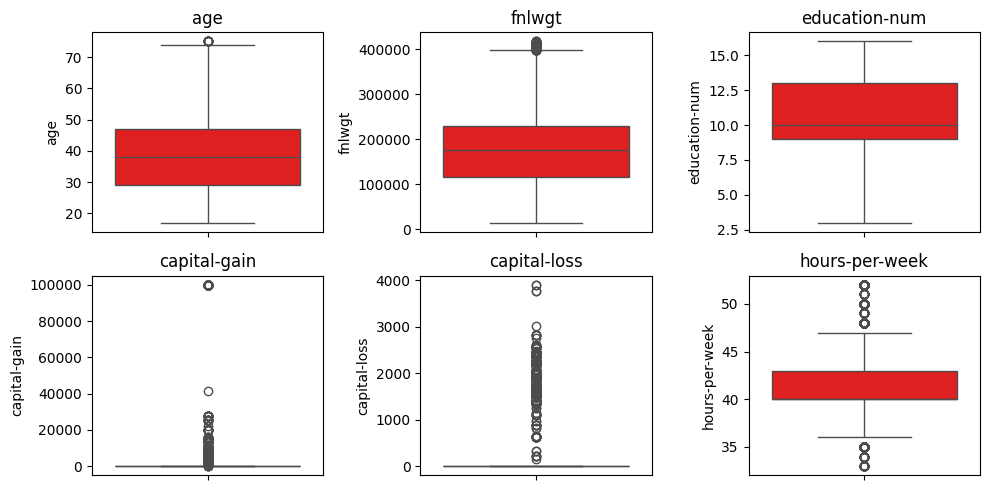

In [333]:

plt.figure(figsize=(10,5))
for i in range(0,len(numerical_features)):
  plt.subplot(2,3,i+1)
  sns.boxplot(df[numerical_features[i]],color='r')
  plt.title(numerical_features[i])

plt.tight_layout()
plt.show()

In [334]:
df.shape

(21317, 15)

In [335]:
# outliers has been removed sucessfully

In [336]:
# converting the  object datatype in to numeric columns:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in df.columns:
  if df[i].dtype=='object':
    df[i] = le.fit_transform(df[i])

In [337]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,5,77516,8,13,4,0,1,4,1,2174,0,40,38,0
2,38,2,215646,10,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,8,13,2,9,5,2,0,0,0,40,4,0
5,37,2,284582,11,14,2,3,5,4,0,0,0,40,38,0


In [338]:
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
32555,22,2,310152,13,10,4,10,1,4,1,0,0,40,38,0
32556,27,2,257302,6,12,2,12,5,4,0,0,0,38,38,0
32557,40,2,154374,10,9,2,6,0,4,1,0,0,40,38,1
32558,58,2,151910,10,9,6,0,4,4,0,0,0,40,38,0
32560,52,3,287927,10,9,2,3,5,4,0,15024,0,40,38,1


We have converted all categorical columns in to numerical columns

In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21317 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             21317 non-null  int64
 1   workclass       21317 non-null  int64
 2   fnlwgt          21317 non-null  int64
 3   education       21317 non-null  int64
 4   education-num   21317 non-null  int64
 5   marital-status  21317 non-null  int64
 6   occupation      21317 non-null  int64
 7   relationship    21317 non-null  int64
 8   race            21317 non-null  int64
 9   sex             21317 non-null  int64
 10  capital-gain    21317 non-null  int64
 11  capital-loss    21317 non-null  int64
 12  hours-per-week  21317 non-null  int64
 13  native-country  21317 non-null  int64
 14  annual_income   21317 non-null  int64
dtypes: int64(15)
memory usage: 2.6 MB


### Machine Learning Process:-

# 1. Logistic Regression:

In [340]:
# X and y devision:(independent and dependent column)

X = df.drop('annual_income',axis=1)
y = df['annual_income']

In [341]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,5,77516,8,13,4,0,1,4,1,2174,0,40,38
2,38,2,215646,10,9,0,5,1,4,1,0,0,40,38
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38
4,28,2,338409,8,13,2,9,5,2,0,0,0,40,4
5,37,2,284582,11,14,2,3,5,4,0,0,0,40,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,2,310152,13,10,4,10,1,4,1,0,0,40,38
32556,27,2,257302,6,12,2,12,5,4,0,0,0,38,38
32557,40,2,154374,10,9,2,6,0,4,1,0,0,40,38
32558,58,2,151910,10,9,6,0,4,4,0,0,0,40,38


In [342]:
y

,annual_income
0,0
2,0
3,0
4,0
5,0
...,...
32555,0
32556,0
32557,1
32558,0


In [343]:
# splitting the data:

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [344]:
# model building:

from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()


In [345]:
# model fitting:

log_model.fit(X_train,y_train)


LogisticRegression()

In [346]:
# predictions:
y_pred =log_model.predict(X_test)

y_pred_train = log_model.predict(X_train)


In [347]:
# checking performance metrics:

from sklearn.metrics import *

In [348]:
print("Train accuracy:",accuracy_score(y_train,y_pred_train))
print()
print("test accuracy:", accuracy_score(y_test,y_pred))

Train accuracy: 0.7786899665747963

test accuracy: 0.7772045028142589


In [349]:
Confusion_matrix = confusion_matrix(y_test,y_pred)
Confusion_matrix

array([[2998,  127],
       [ 823,  316]])

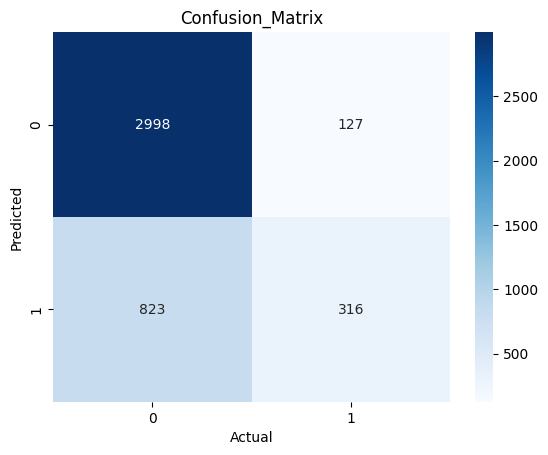

In [350]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues',fmt='d')
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.title("Confusion_Matrix")
plt.show()

### 2. Decision Tree:-

In [351]:
from sklearn.tree import DecisionTreeClassifier

dtree_model = DecisionTreeClassifier()

In [352]:
# model fitting:
dtree_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [353]:
# predictions:
y_pred = dtree_model.predict(X_test)

y_pred_train = dtree_model.predict(X_train)


In [354]:
# evaluation metrics:

log_acc = print("Train_accuracy:",accuracy_score(y_train,y_pred_train))
log_acc

print("Test_accuracy:",accuracy_score(y_test,y_pred))

Train_accuracy: 0.9999413592916202
Test_accuracy: 0.7980769230769231


In [355]:
print(confusion_matrix(y_test,y_pred))

[[2681  444]
 [ 417  722]]


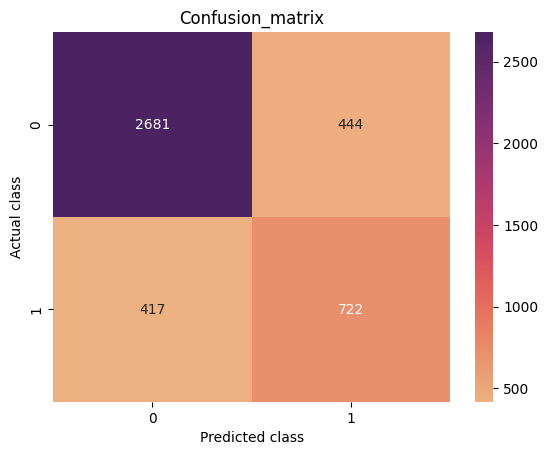

In [356]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='flare',fmt='d')
plt.title("Confusion_matrix")
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.show()

- we can see train accuracy is more than test which showing the overfitting, to reduce the overfitting we will perform further steps

In [357]:
# pruning the tree and deciding the best 'max_depth' which required for the model(controlling the depth of tree):

depth = [1,2,3,4,5,6,7,8,9,10,100]
list1=[]


for x in depth:
  dt_model = DecisionTreeClassifier(max_depth=x,random_state=12)
  dt_model.fit(X_train,y_train)

  #prediction
  y_pred = dt_model.predict(X_test)


  #accuracy check:
  acc = accuracy_score(y_test,y_pred)


  list1.append(acc)


  print(" for Max_depth:",x,  "achieving the Accuracy of:", acc)
print(max(list1))


 for Max_depth: 1 achieving the Accuracy of: 0.7328799249530957
 for Max_depth: 2 achieving the Accuracy of: 0.8123827392120075
 for Max_depth: 3 achieving the Accuracy of: 0.8311444652908068
 for Max_depth: 4 achieving the Accuracy of: 0.8370075046904315
 for Max_depth: 5 achieving the Accuracy of: 0.8377110694183865
 for Max_depth: 6 achieving the Accuracy of: 0.848264540337711
 for Max_depth: 7 achieving the Accuracy of: 0.849671669793621
 for Max_depth: 8 achieving the Accuracy of: 0.8463883677298312
 for Max_depth: 9 achieving the Accuracy of: 0.8438086303939962
 for Max_depth: 10 achieving the Accuracy of: 0.8449812382739212
 for Max_depth: 100 achieving the Accuracy of: 0.799718574108818
0.849671669793621


In [358]:
# at the max_depth of 7 we are getting good accuracy so now we will retrain our model by stricting the max_depth to be 7

dtree_model = DecisionTreeClassifier(max_depth=7,random_state=12)
dtree_model.fit(X_train,y_train)

#prediction:
y_pred = dtree_model.predict(X_test)
y_pred_train = dtree_model.predict(X_train)

#performance check:
dtree_acc = print("Train Accuracy:",accuracy_score(y_train,y_pred_train))
dtree_acc
print()
print("Test accuracy:",accuracy_score(y_test,y_pred))


Train Accuracy: 0.8464199847534158

Test accuracy: 0.849671669793621


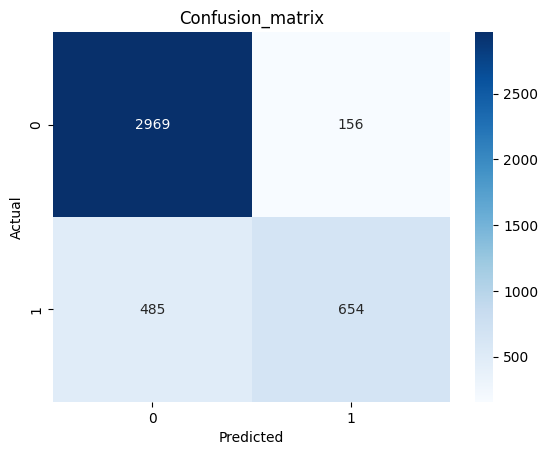

In [359]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues',fmt='d')
plt.title("Confusion_matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

- we can say by controlling the depth of tree we have reduced the model overfitting sucessfully

### 3. RandomForest classifier:-

In [360]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

In [361]:
# model fitting:
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [362]:
# making prediction:
y_pred = rf_model.predict(X_test)
y_pred_train = rf_model.predict(X_train)

In [363]:
# performance metrics:

rf_acc = print(accuracy_score(y_test,y_pred))
rf_acc

0.8440431519699813


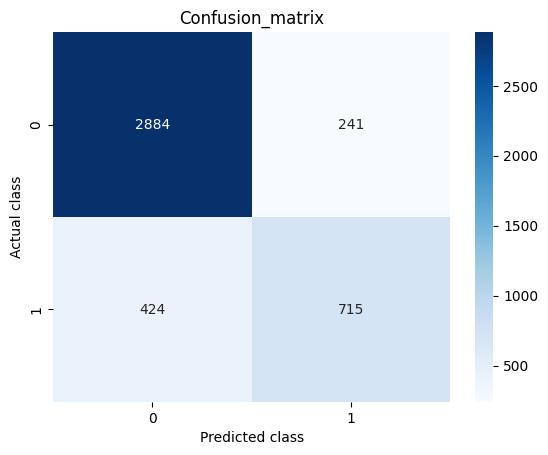

In [364]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues',fmt='d')
plt.title("Confusion_matrix")
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.show()

- We can see that in logistic regression we are getting : 79% accuracy,
- For Decision Tree getting accuracy of : 84%
- For Random forest also getting : 84% of accuracy

So I can use either Decision Tree or Random Forest model for my census income data